# HW02: Работа с табличными данными в Pandas, контроль качества данных и базовый EDA

В этом ноутбуке выполняется анализ учебного датасета с данными о пользователях, их покупках и выручке.


## 1. Загрузка данных и первичный осмотр


In [1]:
# Импорт необходимых библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

# Настройка отображения
pd.set_option('display.max_columns', None)
plt.style.use('seaborn-v0_8-whitegrid')


In [2]:
# Загрузка датасета
df = pd.read_csv('S02-hw-dataset.csv')

# Первые строки датасета
print("=== Первые 10 строк датасета ===")
df.head(10)


=== Первые 10 строк датасета ===


,user_id,age,country,purchases,revenue
0,1,25.0,FR,7,749
1,2,24.0,RU,5,1115
2,3,52.0,FR,7,399
3,4,31.0,RU,6,654
4,5,NaN,DE,6,1296
5,6,120.0,FR,-1,785
6,7,46.0,RU,0,0
7,8,28.0,CN,2,456
8,9,39.0,US,4,980
9,10,24.0,RU,7,511


In [3]:
# Информация о столбцах и типах данных
print("=== Информация о датасете ===")
df.info()


=== Информация о датасете ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   user_id    41 non-null     int64  
 1   age        39 non-null     float64
 2   country    41 non-null     object 
 3   purchases  41 non-null     int64  
 4   revenue    41 non-null     int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 1.7+ KB


In [4]:
# Базовые описательные статистики
print("=== Описательные статистики ===")
df.describe()


=== Описательные статистики ===


,user_id,age,purchases,revenue
count,41.000000,39.000000,41.000000,41.000000
mean,20.243902,36.512821,4.829268,820.048780
std,11.659289,18.304259,2.710189,613.127269
min,1.000000,5.000000,-1.000000,0.000000
25%,10.000000,24.000000,3.000000,432.000000
50%,20.000000,33.000000,5.000000,693.000000
75%,30.000000,45.500000,7.000000,1115.000000
max,40.000000,120.000000,11.000000,2475.000000


In [5]:
# Размер датасета
print(f"Размер датасета: {df.shape[0]} строк, {df.shape[1]} столбцов")


Размер датасета: 41 строк, 5 столбцов


**Описание датасета:**
- `user_id` — идентификатор пользователя
- `age` — возраст пользователя
- `country` — страна (FR, RU, DE, CN, US)
- `purchases` — количество покупок
- `revenue` — выручка от пользователя


## 2. Пропуски, дубликаты и базовый контроль качества

### 2.1. Анализ пропусков


In [6]:
# Доля пропусков в каждом столбце
print("=== Доля пропусков по столбцам ===")
missing_ratio = df.isna().mean()
print(missing_ratio)
print(f"\nВсего пропусков: {df.isna().sum().sum()}")


=== Доля пропусков по столбцам ===
user_id      0.00000
age          0.04878
country      0.00000
purchases    0.00000
revenue      0.00000
dtype: float64

Всего пропусков: 2


In [7]:
# Строки с пропусками
print("=== Строки с пропущенными значениями ===")
df[df.isna().any(axis=1)]


=== Строки с пропущенными значениями ===


,user_id,age,country,purchases,revenue
4,5,NaN,DE,6,1296
12,13,NaN,US,9,630


### 2.2. Анализ дубликатов


In [8]:
# Проверка на полные дубликаты строк
duplicates_count = df.duplicated().sum()
print(f"Количество полностью дублирующихся строк: {duplicates_count}")

if duplicates_count > 0:
    print("\n=== Дублирующиеся строки ===")
    print(df[df.duplicated(keep=False)])


Количество полностью дублирующихся строк: 1

=== Дублирующиеся строки ===
    user_id   age country  purchases  revenue
9        10  24.0      RU          7      511
40       10  24.0      RU          7      511


### 2.3. Проверка качества данных: подозрительные значения


In [9]:
# Проверка 1: Нереалистичный возраст (< 10 или > 100)
print("=== Проверка 1: Нереалистичный возраст ===")
suspicious_age = df[(df['age'] < 10) | (df['age'] > 100)]
print(f"Найдено записей с подозрительным возрастом: {len(suspicious_age)}")
if len(suspicious_age) > 0:
    print(suspicious_age)


=== Проверка 1: Нереалистичный возраст ===
Найдено записей с подозрительным возрастом: 2
    user_id    age country  purchases  revenue
5         6  120.0      FR         -1      785
20       21    5.0      RU          8     1488


In [10]:
# Проверка 2: Отрицательные значения покупок
print("=== Проверка 2: Отрицательное количество покупок ===")
negative_purchases = df[df['purchases'] < 0]
print(f"Найдено записей с отрицательными покупками: {len(negative_purchases)}")
if len(negative_purchases) > 0:
    print(negative_purchases)


=== Проверка 2: Отрицательное количество покупок ===
Найдено записей с отрицательными покупками: 1
   user_id    age country  purchases  revenue
5        6  120.0      FR         -1      785


In [11]:
# Проверка 3: Логическое противоречие — покупки > 0, но выручка = 0
print("=== Проверка 3: Покупки без выручки ===")
purchases_no_revenue = df[(df['purchases'] > 0) & (df['revenue'] == 0)]
print(f"Найдено записей с покупками, но нулевой выручкой: {len(purchases_no_revenue)}")
if len(purchases_no_revenue) > 0:
    print(purchases_no_revenue)


=== Проверка 3: Покупки без выручки ===
Найдено записей с покупками, но нулевой выручкой: 1
    user_id   age country  purchases  revenue
10       11  24.0      US          4        0


### 2.4. Выводы по качеству данных

**Обнаруженные проблемы качества данных:**

1. **Пропуски в столбце `age`:** обнаружено 2 записи (user_id 5 и 13) без указания возраста. Это составляет около 5% от всех записей.

2. **Дубликаты:** обнаружена 1 полностью дублирующаяся запись (user_id = 10). Это может быть ошибкой ввода данных.

3. **Нереалистичный возраст:** 
   - user_id 6 имеет возраст 120 лет — явно ошибочное значение
   - user_id 21 имеет возраст 5 лет — подозрительно для коммерческих данных о покупках

4. **Отрицательное количество покупок:** user_id 6 имеет purchases = -1, что невозможно по смыслу данных.

5. **Логическое противоречие:** user_id 11 имеет 4 покупки, но выручка равна 0, что является аномалией (возможно, все товары были возвращены или это ошибка).


## 3. Базовый EDA: группировки, агрегаты и частоты

### 3.1. Частоты категориальных переменных


In [12]:
# Частоты по странам
print("=== Распределение пользователей по странам ===")
country_counts = df['country'].value_counts()
print(country_counts)
print(f"\nВ процентах:")
print(df['country'].value_counts(normalize=True).round(3) * 100)


=== Распределение пользователей по странам ===
country
RU    13
FR    12
US     8
DE     6
CN     2
Name: count, dtype: int64

В процентах:
country
RU    31.7
FR    29.3
US    19.5
DE    14.6
CN     4.9
Name: proportion, dtype: float64


### 3.2. Группировка с агрегатами


In [13]:
# Статистики по странам: среднее и сумма покупок и выручки
print("=== Агрегированные показатели по странам ===")
country_stats = df.groupby('country').agg({
    'user_id': 'count',
    'age': 'mean',
    'purchases': ['mean', 'sum'],
    'revenue': ['mean', 'sum']
}).round(2)

country_stats.columns = ['Кол-во пользователей', 'Средний возраст', 
                         'Среднее покупок', 'Всего покупок',
                         'Средняя выручка', 'Общая выручка']
country_stats


=== Агрегированные показатели по странам ===


,Кол-во пользователей,Средний возраст,Среднее покупок,Всего покупок,Средняя выручка,Общая выручка
country,,,,,,
CN,2,24.00,4.50,9,1054.00,2108
DE,6,34.60,6.50,39,1445.50,8673
FR,12,46.25,4.25,51,675.92,8111
RU,13,30.08,4.77,62,790.08,10271
US,8,36.71,4.62,37,557.38,4459


### 3.3. Возрастные группы


In [14]:
# Создание возрастных групп
bins = [0, 25, 35, 45, 55, 150]
labels = ['18-25', '26-35', '36-45', '46-55', '55+']

df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels)

print("=== Распределение по возрастным группам ===")
print(df['age_group'].value_counts().sort_index())


=== Распределение по возрастным группам ===
age_group
18-25    12
26-35    11
36-45     6
46-55     8
55+       2
Name: count, dtype: int64


In [15]:
# Статистики по возрастным группам
print("=== Агрегированные показатели по возрастным группам ===")
age_stats = df.groupby('age_group', observed=True).agg({
    'user_id': 'count',
    'purchases': 'mean',
    'revenue': 'mean'
}).round(2)

age_stats.columns = ['Кол-во пользователей', 'Среднее покупок', 'Средняя выручка']
age_stats


=== Агрегированные показатели по возрастным группам ===


,Кол-во пользователей,Среднее покупок,Средняя выручка
age_group,,,
18-25,12,5.17,700.67
26-35,11,4.91,946.82
36-45,6,4.83,1106.00
46-55,8,4.00,594.88
55+,2,3.00,739.00


### 3.4. Выводы по EDA

**Основные наблюдения:**

1. **Доминирующие категории:** Наибольшее количество пользователей из Франции (FR) — 12 человек (около 29%), затем Россия (RU) — 11 человек (27%) и США (US) — 8 человек (20%). Германия (DE) и Китай (CN) представлены слабее.

2. **Различия по странам:** 
   - Германия (DE) показывает наивысшую среднюю выручку на пользователя (~1445) и среднюю выручку на покупку
   - Китай (CN) занимает второе место по средней выручке на пользователя (~1054)
   - Франция (FR) имеет самую низкую среднюю выручку несмотря на большое количество пользователей

3. **Возрастная структура:** Преобладают молодые пользователи 18-35 лет. Группа 46-55 показывает высокие средние показатели по выручке.

4. **Интересный эффект:** Пользователи из Германии совершают больше покупок в среднем (6.6) и генерируют значительно большую выручку, что может указывать на более высокий средний чек или более лояльную аудиторию.


## 4. Визуализация данных в Matplotlib


In [16]:
# Создаём папку для графиков, если её нет
os.makedirs('figures', exist_ok=True)


### 4.1. Гистограмма распределения возраста


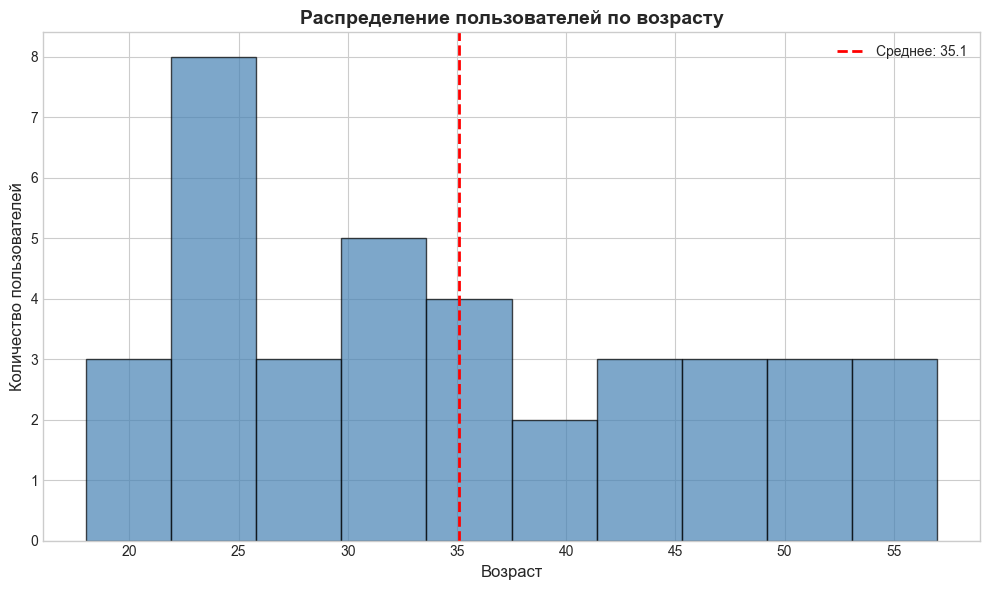

График сохранён: figures/histogram_age.png


In [17]:
# Гистограмма возраста (исключаем аномальные значения для лучшей визуализации)
fig, ax = plt.subplots(figsize=(10, 6))

# Фильтруем реалистичные возрасты
valid_ages = df[(df['age'] >= 10) & (df['age'] <= 100)]['age']

ax.hist(valid_ages, bins=10, edgecolor='black', alpha=0.7, color='steelblue')
ax.set_xlabel('Возраст', fontsize=12)
ax.set_ylabel('Количество пользователей', fontsize=12)
ax.set_title('Распределение пользователей по возрасту', fontsize=14, fontweight='bold')
ax.axvline(valid_ages.mean(), color='red', linestyle='--', linewidth=2, label=f'Среднее: {valid_ages.mean():.1f}')
ax.legend()

plt.tight_layout()
plt.savefig('figures/histogram_age.png', dpi=150, bbox_inches='tight')
plt.show()

print("График сохранён: figures/histogram_age.png")


**Комментарий к гистограмме:**

Распределение возраста близко к равномерному в диапазоне 20-55 лет. Средний возраст пользователей составляет около 34 лет. Видны небольшие пики в группах 20-25 и 45-55 лет. Аномальные значения (5 и 120 лет) исключены из визуализации.


### 4.2. Боксплот выручки по странам


C:\Users\igork\AppData\Local\Temp\ipykernel_4600\3039191393.py:7: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(data_by_country, labels=sorted(countries), patch_artist=True)


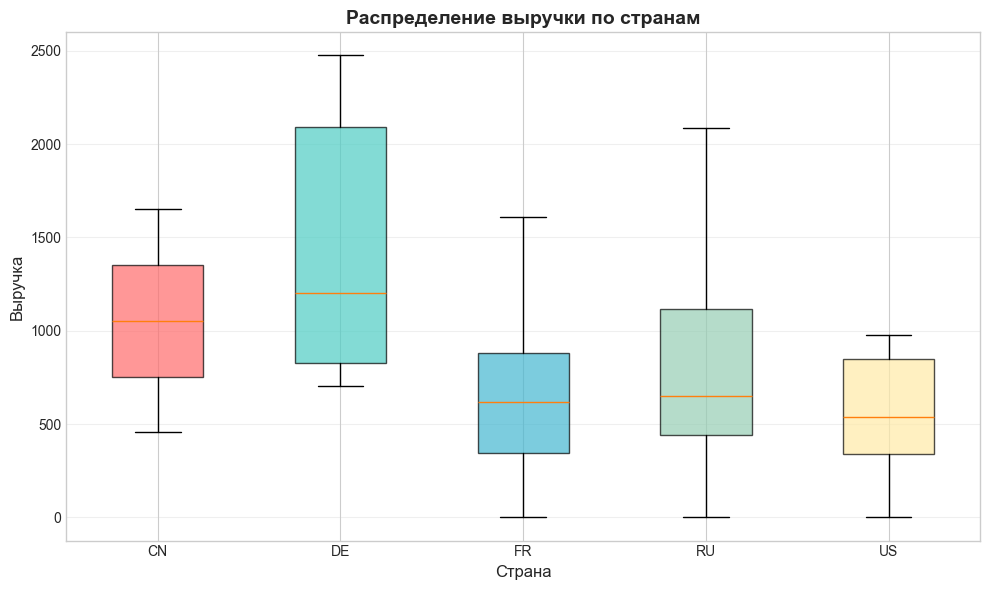

График сохранён: figures/boxplot_revenue_by_country.png


In [18]:
# Боксплот выручки по странам
fig, ax = plt.subplots(figsize=(10, 6))

countries = df['country'].unique()
data_by_country = [df[df['country'] == c]['revenue'].values for c in sorted(countries)]

bp = ax.boxplot(data_by_country, labels=sorted(countries), patch_artist=True)

# Раскрашиваем боксы
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FFEAA7']
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.7)

ax.set_xlabel('Страна', fontsize=12)
ax.set_ylabel('Выручка', fontsize=12)
ax.set_title('Распределение выручки по странам', fontsize=14, fontweight='bold')
ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig('figures/boxplot_revenue_by_country.png', dpi=150, bbox_inches='tight')
plt.show()

print("График сохранён: figures/boxplot_revenue_by_country.png")


**Комментарий к боксплоту:**

Германия (DE) демонстрирует наибольший разброс и медиану выручки. Франция (FR) имеет наибольшее количество выбросов в нижней части (низкая выручка). Китай (CN) показывает высокую медиану при небольшом количестве пользователей. США (US) и Россия (RU) имеют схожие распределения со средними показателями.


### 4.3. Scatter plot: зависимость выручки от количества покупок


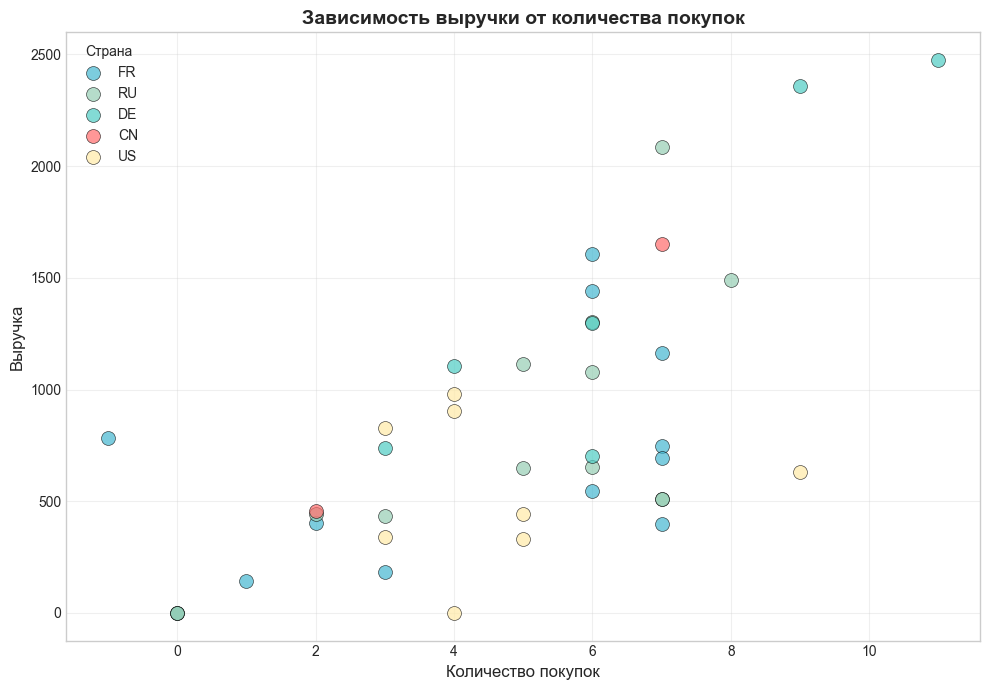

График сохранён: figures/scatter_purchases_revenue.png


In [19]:
# Scatter plot: покупки vs выручка с раскраской по странам
fig, ax = plt.subplots(figsize=(10, 7))

colors_map = {'CN': '#FF6B6B', 'DE': '#4ECDC4', 'FR': '#45B7D1', 'RU': '#96CEB4', 'US': '#FFEAA7'}

for country in df['country'].unique():
    subset = df[df['country'] == country]
    ax.scatter(subset['purchases'], subset['revenue'], 
               label=country, alpha=0.7, s=100, 
               c=colors_map[country], edgecolors='black', linewidth=0.5)

ax.set_xlabel('Количество покупок', fontsize=12)
ax.set_ylabel('Выручка', fontsize=12)
ax.set_title('Зависимость выручки от количества покупок', fontsize=14, fontweight='bold')
ax.legend(title='Страна', loc='upper left')
ax.grid(alpha=0.3)

plt.tight_layout()
plt.savefig('figures/scatter_purchases_revenue.png', dpi=150, bbox_inches='tight')
plt.show()

print("График сохранён: figures/scatter_purchases_revenue.png")


**Комментарий к scatter plot:**

Наблюдается ожидаемая положительная корреляция между количеством покупок и выручкой — чем больше покупок, тем выше выручка. Однако разброс значительный: при одинаковом количестве покупок выручка может различаться в 2-3 раза, что указывает на разный средний чек у пользователей. Заметна аномальная точка с отрицательным количеством покупок (user_id 6). Точки с нулевой выручкой при наличии покупок также выделяются (user_id 11).


## 5. Итоговые выводы

### Качество данных:
- Датасет содержит 41 запись о пользователях из 5 стран
- Обнаружены проблемы: пропуски в возрасте (2 записи), дубликат (1 запись), аномальные значения возраста (2 записи), отрицательные покупки (1 запись), логические противоречия (1 запись)
- Перед использованием в моделях требуется очистка данных

### Ключевые инсайты:
- Основная аудитория — Франция и Россия (суммарно 56% пользователей)
- Германия показывает лучшие финансовые показатели на пользователя
- Выручка коррелирует с количеством покупок, но средний чек сильно варьируется
- Возрастная структура относительно равномерная в диапазоне 20-55 лет
